In [1]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import GRU
import tensorflow as tf
import seaborn as sns

%matplotlib inline

2023-05-17 03:47:19.733012: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 03:47:19.931476: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-17 03:47:20.691429: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/rugewit/anaconda3/envs/tf2/lib/
2023-05-17 03:47:20.691543: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plug

Загрузка датасета

In [2]:
df = pd.read_csv('monthly-juice-production-in-austr.csv')

Описание

In [3]:
df.head()

,Month,Monthly juice production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     476 non-null    object 
 1   Monthly juice production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [5]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")
df.head()

,Monthly juice production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


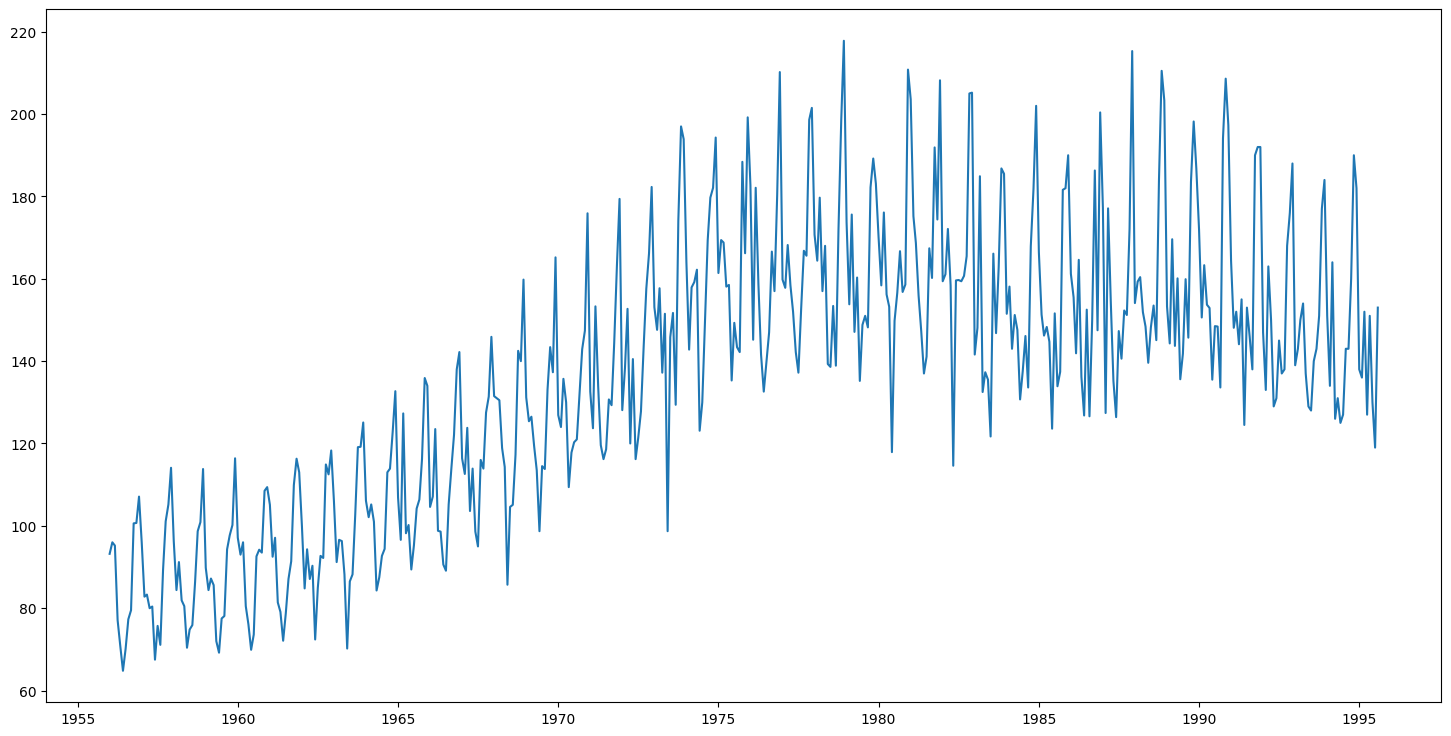

In [6]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["Monthly juice production"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show();

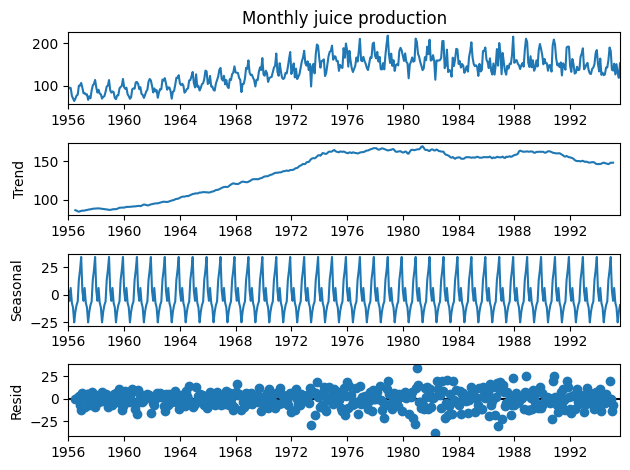

In [7]:
a = seasonal_decompose(df["Monthly juice production"], model = "add")
a.plot();

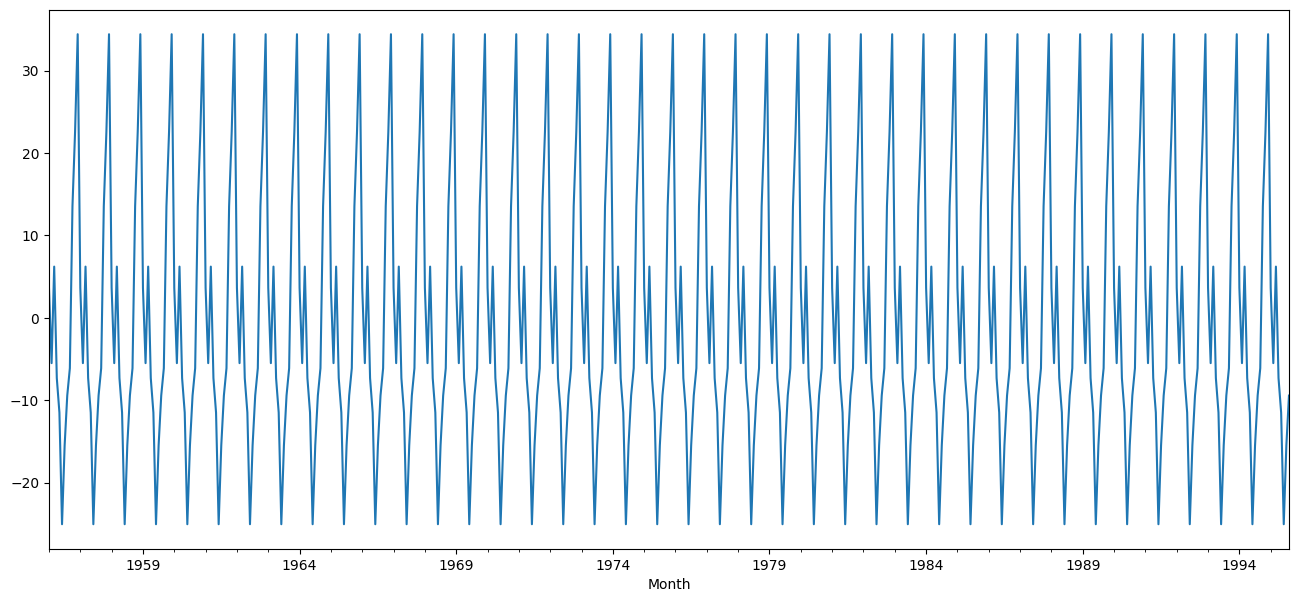

In [8]:
plt.figure(figsize = (16,7))
a.seasonal.plot();

p-value

In [9]:
adf_test = adfuller(df["Monthly juice production"])
print('p-value = ' + str(adf_test[1]))

p-value = 0.17762099829132294


ARIMA

In [10]:
train_data = df[:len(df)-12]
print(train_data)
test_data = df[len(df)-12:]

            Monthly juice production
Month                               
1956-01-01                      93.2
1956-02-01                      96.0
1956-03-01                      95.2
1956-04-01                      77.1
1956-05-01                      70.9
...                              ...
1994-04-01                     126.0
1994-05-01                     131.0
1994-06-01                     125.0
1994-07-01                     127.0
1994-08-01                     143.0

[464 rows x 1 columns]


In [11]:
arima_model = SARIMAX(train_data['Monthly juice production'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.11947D+00    |proj g|=  1.61673D-01


 This problem is unconstrained.



At iterate    5    f=  4.02339D+00    |proj g|=  4.51168D-02

At iterate   10    f=  3.79643D+00    |proj g|=  5.26473D-02

At iterate   15    f=  3.75357D+00    |proj g|=  5.40465D-02

At iterate   20    f=  3.71374D+00    |proj g|=  1.09027D-02

At iterate   25    f=  3.71142D+00    |proj g|=  1.83037D-02

At iterate   30    f=  3.70593D+00    |proj g|=  1.19925D-01

At iterate   35    f=  3.68721D+00    |proj g|=  1.23977D-01

At iterate   40    f=  3.68165D+00    |proj g|=  2.87566D-02

At iterate   45    f=  3.68097D+00    |proj g|=  8.79735D-03

At iterate   50    f=  3.68077D+00    |proj g|=  3.29920D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                   Monthly juice production   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -1707.876
Date:                                    Wed, 17 May 2023   AIC                           3437.753
Time:                                            03:47:41   BIC                           3483.268
Sample:                                        01-01-1956   HQIC                          3455.671
                                             - 08-01-1994                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1175      0.034     -3.449      0.001      -0.184      -0.051
ar.L2         -0.1600      0.044     -3.653      0.000      -0.246      -0.074
ma.L1         -0.8556      0.024    -35.123      0.000      -0.903      -0.808
ar.S.L12       1.7407      0.112     15.571      0.000       1.522       1.960
ar.S.L24      -1.5934      0.211     -7.568      0.000      -2.006      -1.181
ar.S.L36       0.7766      0.163      4.777      0.000       0.458       1.095
ar.S.L48       0.0748      0.060      1.241      0.215      -0.043       0.193
ma.S.L12      -1.5476      0.123    -12.607      0.000      -1.788      -1.307
ma.S.L24       1.3991      0.200      6.986      0.000       1.007       1.792
ma.S.L36      -0.6684      0.114     -5.878      0.000      -0.891      -0.446
sigma2        83.4905      4.915     16.986      0.000      73.857      93.124
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                43.60
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               4.09   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1994-09-01    133.815403
1994-10-01    158.034158
1994-11-01    182.253957
1994-12-01    183.628698
1995-01-01    144.554013
1995-02-01    136.863790
1995-03-01    151.007905
1995-04-01    133.420254
1995-05-01    138.191847
1995-06-01    120.489525
1995-07-01    128.423263
1995-08-01    138.794491
Freq: MS, Name: ARIMA Predictions, dtype: float64

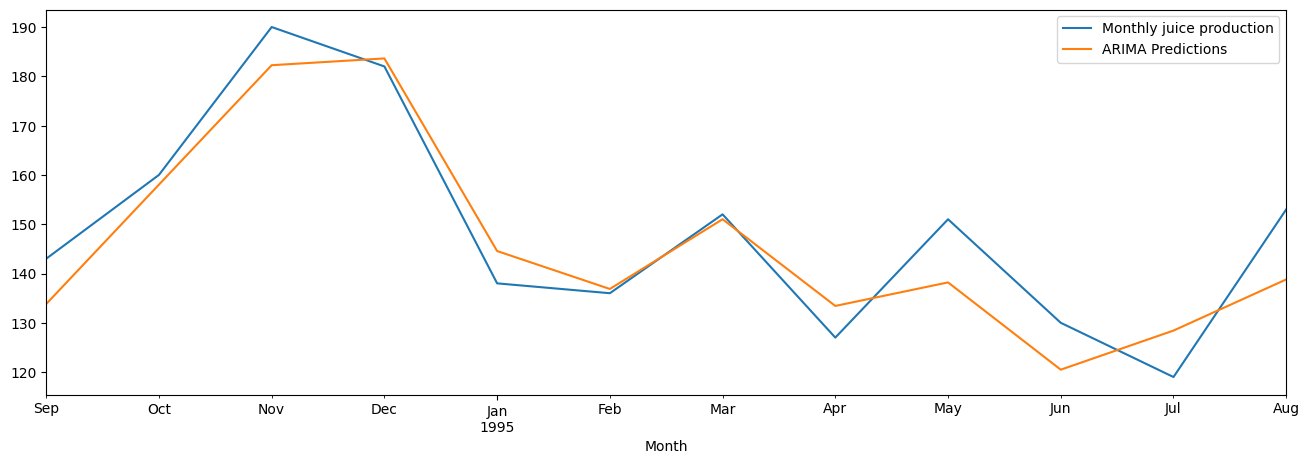

In [13]:
test_data['Monthly juice production'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [14]:
arima_rmse_error = rmse(test_data['Monthly juice production'], arima_pred)
arima_mse_error = arima_rmse_error**2
arima_mae_error = mean_absolute_error(test_data['Monthly juice production'], arima_pred)
mean_value = df['Monthly juice production'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 65.15605119152524
RMSE Error: 8.071929830686416
Mean: 136.3953781512605


In [15]:
global_test_data = test_data.copy()
global_test_data['ARIMA_Predictions'] = arima_pred

RNN

In [16]:
scaler = MinMaxScaler()

scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [17]:
n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [18]:
'''
RNN_model = Sequential()
RNN_model.add(SimpleRNN(100, activation='relu', input_shape=(n_input, n_features)))
RNN_model.add(Dense(1))
'''


rnn_model = tf.keras.Sequential([
    #tf.keras.Input(shape=(n_input, n_features)),
    tf.keras.layers.Conv1D(filters=128, kernel_size=3,
                           strides=1, padding="causal",
                           activation="relu",
                           input_shape=[n_input, n_features]),
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.LSTM(40),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')

rnn_model.summary()

2023-05-17 03:47:42.292248: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-17 03:47:42.323558: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-17 03:47:42.323778: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-17 03:47:42.324268: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 12, 128)           512       
                                                                 
 lstm (LSTM)                 (None, 12, 100)           91600     
                                                                 
 lstm_1 (LSTM)               (None, 40)                22560     
                                                                 
 dense (Dense)               (None, 40)                1640      
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 116,353
Trainable params: 116,353
Non-trainable params: 0
_________________________________________________________________


In [19]:
rnn_model.fit_generator(generator,epochs=20)

Epoch 1/20


2023-05-17 03:47:45.919103: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


452/452 [==============================] - 7s 7ms/step - loss: 0.0213
Epoch 2/20
452/452 [==============================] - 3s 7ms/step - loss: 0.0097
Epoch 3/20
452/452 [==============================] - 3s 7ms/step - loss: 0.0089
Epoch 4/20
452/452 [==============================] - 3s 7ms/step - loss: 0.0081
Epoch 5/20
452/452 [==============================] - 3s 7ms/step - loss: 0.0079
Epoch 6/20
452/452 [==============================] - 3s 7ms/step - loss: 0.0074
Epoch 7/20
452/452 [==============================] - 3s 7ms/step - loss: 0.0079
Epoch 8/20
452/452 [==============================] - 3s 7ms/step - loss: 0.0072
Epoch 9/20
452/452 [==============================] - 3s 7ms/step - loss: 0.0076
Epoch 10/20
452/452 [==============================] - 3s 7ms/step - loss: 0.0074
Epoch 11/20
452/452 [==============================] - 3s 7ms/step - loss: 0.0070
Epoch 12/20
452/452 [==============================] - 3s 7ms/step - loss: 0.0072
Epoch 13/20
452/452 [===============

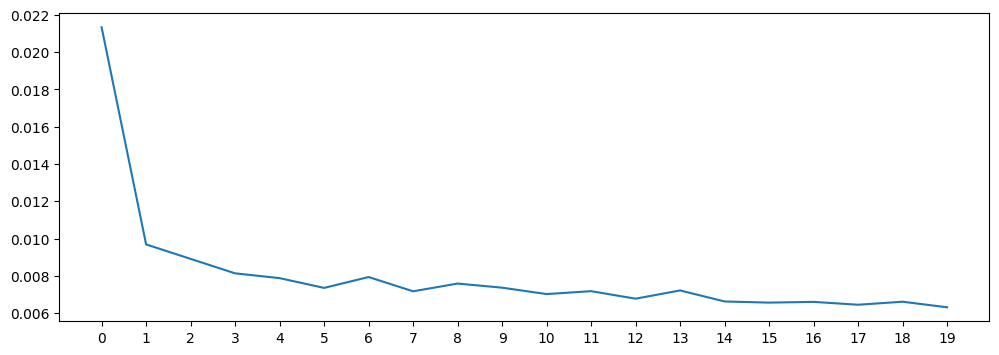

In [20]:
losses_rnn = rnn_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_rnn)),losses_rnn);

In [21]:
rnn_predictions_scaled = list()

# last n_input elements
batch = scaled_train_data[-n_input:]
print('batch')
print(batch)
print('shape is ', batch.shape)
# shape now is (1, 12, 1)
current_batch = batch.reshape((1, n_input, n_features))
print('current batch')
print(current_batch)
print('shape is ', current_batch.shape)
for i in range(len(test_data)):   
    rnn_pred = rnn_model.predict(current_batch)[0]
    rnn_predictions_scaled.append(rnn_pred) 
    # first element in current_batch will be gone
    # a new element will be inserted at the end
    current_batch = np.append(current_batch[:,1:,:],[[rnn_pred]],axis=1)
    print('current_batch now\n', current_batch)
    print('current_batch shape\n', current_batch.shape)

batch
[[0.51111111]
 [0.56339869]
 [0.73333333]
 [0.77908497]
 [0.56339869]
 [0.45228758]
 [0.64836601]
 [0.4       ]
 [0.43267974]
 [0.39346405]
 [0.40653595]
 [0.51111111]]
shape is  (12, 1)
current batch
[[[0.51111111]
  [0.56339869]
  [0.73333333]
  [0.77908497]
  [0.56339869]
  [0.45228758]
  [0.64836601]
  [0.4       ]
  [0.43267974]
  [0.39346405]
  [0.40653595]
  [0.51111111]]]
shape is  (1, 12, 1)
1/1 [==============================] - 1s 514ms/step
current_batch now
 [[[0.56339869]
  [0.73333333]
  [0.77908497]
  [0.56339869]
  [0.45228758]
  [0.64836601]
  [0.4       ]
  [0.43267974]
  [0.39346405]
  [0.40653595]
  [0.51111111]
  [0.53249514]]]
current_batch shape
 (1, 12, 1)
1/1 [==============================] - 0s 17ms/step
current_batch now
 [[[0.73333333]
  [0.77908497]
  [0.56339869]
  [0.45228758]
  [0.64836601]
  [0.4       ]
  [0.43267974]
  [0.39346405]
  [0.40653595]
  [0.51111111]
  [0.53249514]
  [0.63467002]]]
current_batch shape
 (1, 12, 1)
1/1 [==============

In [22]:
rnn_predictions_scaled

[array([0.53249514], dtype=float32),
 array([0.63467], dtype=float32),
 array([0.7809238], dtype=float32),
 array([0.78967977], dtype=float32),
 array([0.6018437], dtype=float32),
 array([0.5854557], dtype=float32),
 array([0.62852275], dtype=float32),
 array([0.47466382], dtype=float32),
 array([0.46639648], dtype=float32),
 array([0.4417564], dtype=float32),
 array([0.45713276], dtype=float32),
 array([0.51086277], dtype=float32)]

In [23]:
rnn_predictions = scaler.inverse_transform(rnn_predictions_scaled)

In [24]:
global_test_data['RNN_Predictions'] = rnn_predictions

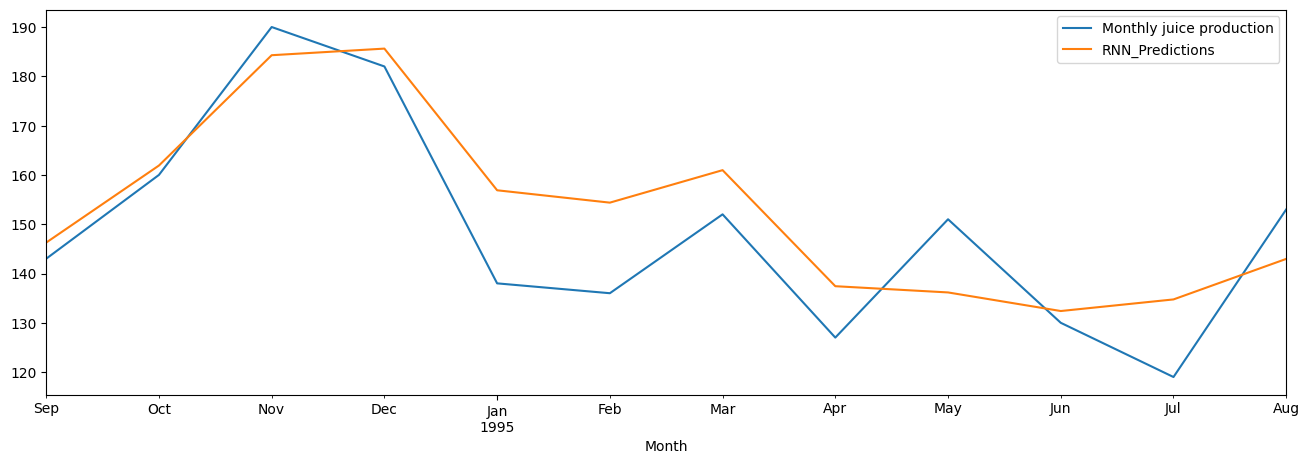

In [25]:
global_test_data['Monthly juice production'].plot(figsize = (16,5), legend=True)
global_test_data['RNN_Predictions'].plot(legend = True);

In [26]:
rnn_rmse_error = rmse(global_test_data['Monthly juice production'], global_test_data["RNN_Predictions"])
rnn_mse_error = rnn_rmse_error**2
rnn_mae_error = mean_absolute_error(global_test_data['Monthly juice production'], global_test_data["RNN_Predictions"])
mean_value = df['Monthly juice production'].mean()

print(f'MSE Error: {rnn_mse_error}\nRMSE Error: {rnn_rmse_error}\nMean: {mean_value}')

MSE Error: 126.48628078582846
RMSE Error: 11.246611969203368
Mean: 136.3953781512605


In [27]:
rmse_errors = [arima_rmse_error, rnn_rmse_error]
mse_errors = [arima_mse_error, rnn_mse_error]
mae_errors = [arima_mae_error, rnn_mae_error]

In [28]:
errors = pd.DataFrame({"Models" : ["ARIMA", "RNN"],"RMSE Error" : rmse_errors, "MSE Error" : mse_errors,"MAE Error": mae_errors})

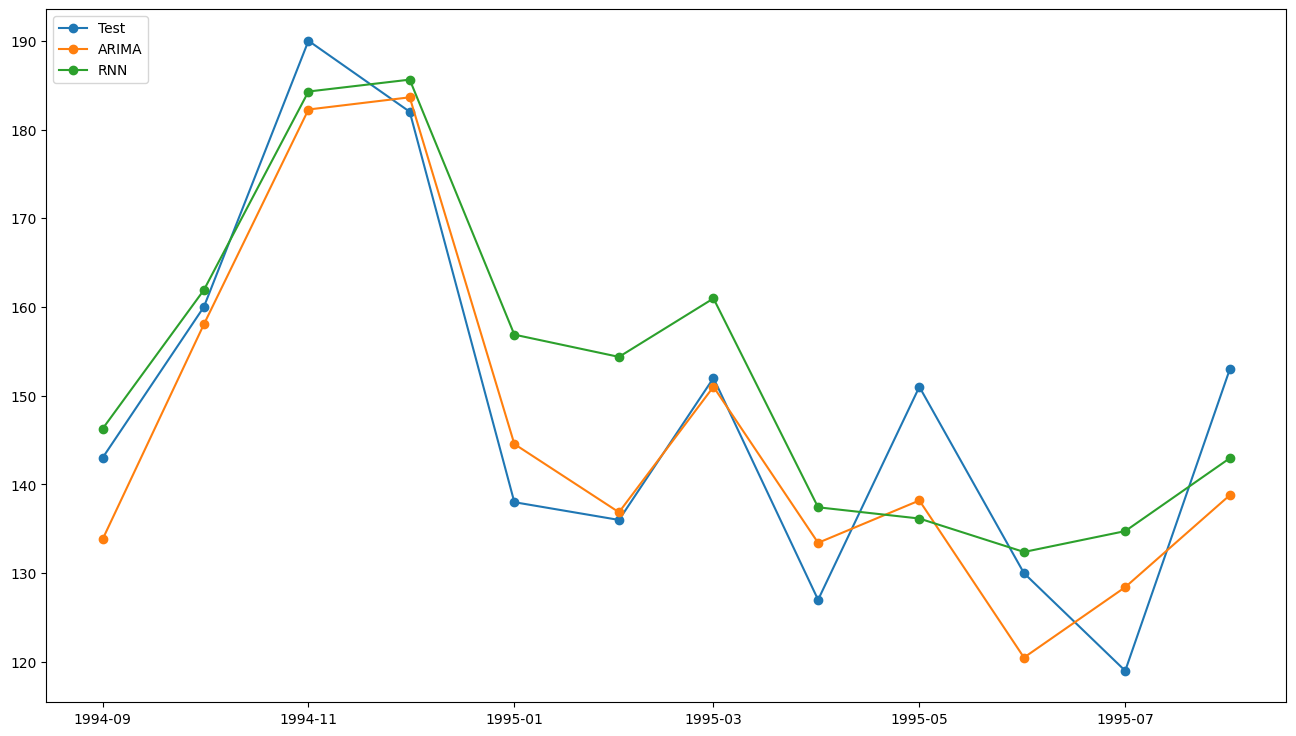

In [29]:
plt.figure(figsize=(16,9))
plt.plot_date(global_test_data.index, global_test_data["Monthly juice production"], linestyle="-")
plt.plot_date(global_test_data.index, global_test_data["ARIMA_Predictions"], linestyle="-")
plt.plot_date(global_test_data.index, global_test_data["RNN_Predictions"], linestyle="-")
plt.legend(["Test", "ARIMA", 'RNN'], loc ="upper left")
plt.show()

In [30]:
print(f"Mean: {global_test_data['Monthly juice production'].mean()}")
errors

Mean: 148.41666666666666


,Models,RMSE Error,MSE Error,MAE Error
0,ARIMA,8.071930,65.156051,6.775228
1,RNN,11.246612,126.486281,9.514139


In [31]:
global_test_data

,Monthly juice production,ARIMA_Predictions,RNN_Predictions
Month,,,
1994-09-01,143.0,133.815403,146.271757
1994-10-01,160.0,158.034158,161.904513
1994-11-01,190.0,182.253957,184.281339
1994-12-01,182.0,183.628698,185.621004
1995-01-01,138.0,144.554013,156.882088
1995-02-01,136.0,136.863790,154.374724
1995-03-01,152.0,151.007905,160.963981
1995-04-01,127.0,133.420254,137.423565
1995-05-01,151.0,138.191847,136.158662
